<h1><center>Internações por doenças relacionada ao saneamento ambiental inadequado</center></h1>

### Objetivo: Entender o grupo populacional mais atigindo pelas doenças relaciondas ao saneamento inadequado

 Foram coletados dados de internações do SUS por doença relacionadas ao saneamento inadequado considreando a raça, gênero, localidade do paciente e localidade do hospital de internação. Assim, obteve-se <u>157 internações</u> de Dezembro de 2019 até maior de 2020.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium 
import branca  
import seaborn as sns 
import folium
from folium import plugins
import branca.colormap
from collections import defaultdict

%matplotlib inline

Carregando os conjuntos de dados a ser usados

In [2]:
sih = pd.read_csv('sih_rj_dez19_mai20_tratado.csv', index_col=0)

In [3]:
# Visualizando as primeira linhas do dataframe
sih.head()

,ANO,MES,TIPO_ATENDIMENTO,CEP_PACIENTE,GENERO,CID_DESCRI,CID_COD,SITUACAO,CNES,RACA_COR,...,BAIRRO,CEP,LATITUDE,LONGITUDE,ENDERECO_PACIENTE,LOCATION_PACIENTE,POINT,BAIRRO_PACIENTE,LATITUDE_PACIENTE,LONGITUDE_PACIENTE
0,2020,Jan,clin_medica,21660500,M,tto hepatite viral,cid[B159]-Hepatite A sem coma hepático,internado para diagnostico,2269880,ignorado,...,BONSUCESSO,21041000,-22.86714,-43.24854,"Rua Margem da Linha, Barros Filho, Rio de Jane...","Rua Margem da Linha, Margem da Linha, Barros F...","(-22.8370879, -43.3680663, 0.0)",Barros Filho,-22.837088,-43.368066
1,2020,Jan,pediatria,21012140,F,tto infec. perinatal,cid[H10]-Conjuntivite,internado para diagnostico,2269880,ignorado,...,BONSUCESSO,21041000,-22.86714,-43.24854,"Estrada do Porto Velho, Cordovil, Rio de Janei...","Estrada do Porto Velho, Cidade Alta, Cordovil,...","(-22.8209659, -43.2922273, 0.0)",Cordovil,-22.820966,-43.292227
2,2020,Abr,clin_medica,21931350,F,tto infecções virais,cid[B08]-Outras infecções virais caracterizada...,internado para diagnostico,2269880,ignorado,...,BONSUCESSO,21041000,-22.86714,-43.24854,"Rua Gregório de Castro Morais, Jardim Guanabar...","Rua Gregório de Castro Morais, Jardim Guanabar...","(-22.8059119, -43.2029146, 0.0)",Jardim Guanabara,-22.805912,-43.202915
3,2019,Dez,pediatria,20261004,M,tto doenças infec e intestinais,cid[A09]-Diarréia e gastroenterite de origem i...,internado para diagnostico,2269880,parda,...,BONSUCESSO,21041000,-22.86714,-43.24854,"Rua Aureliano Portugal, Rio Comprido, Rio de J...","Rua Aureliano Portugal, Rio Comprido, Zona Cen...","(-22.9262258, -43.2157276, 0.0)",Rio Comprido,-22.926226,-43.215728
4,2019,Dez,clin_medica,21210070,M,tto doenças infec e intestinais,cid[A09]-Diarréia e gastroenterite de origem i...,internado para diagnostico,2269880,branca,...,BONSUCESSO,21041000,-22.86714,-43.24854,"Rua Arquimedes Memória, Vila da Penha, Rio de ...","Rua Arquimedes Memória, Vila da Penha, Zona No...","(-22.8452131, -43.3048533, 0.0)",Vila da Penha,-22.845213,-43.304853


#### Observando o conjunto de dados

In [12]:
sih.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 156
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           157 non-null    int64  
 1   Unnamed: 0.1.1         157 non-null    int64  
 2   ANO                    157 non-null    int64  
 3   MES                    157 non-null    object 
 4   TIPO_ATENDIMENTO       157 non-null    object 
 5   CEP_PACIENTE           157 non-null    int64  
 6   GENERO                 157 non-null    object 
 7   CID_DESCRI             157 non-null    object 
 8   CID_COD                157 non-null    object 
 9   SITUACAO               157 non-null    object 
 10  CNES                   157 non-null    int64  
 11  RACA_COR               157 non-null    object 
 12  IDADE                  157 non-null    int64  
 13  IBGE                   157 non-null    int64  
 14  UF                     157 non-null    object 
 15  MUNICI

In [40]:
sih.describe()

,ANO,CEP_PACIENTE,CNES,IDADE,IBGE,CNPJ PROPRIO,CNPJ MANTENEDORA,CEP,LATITUDE,LONGITUDE,LATITUDE_PACIENTE,LONGITUDE_PACIENTE
count,157.000000,1.570000e+02,1.570000e+02,157.000000,157.0,1.230000e+02,1.140000e+02,1.570000e+02,157.000000,157.000000,122.000000,122.000000
mean,2019.878981,2.177398e+07,2.665822e+06,25.070064,330455.0,2.087809e+13,3.062376e+13,2.166932e+07,-22.872337,-43.278739,-22.900280,-43.352330
std,0.327193,9.592385e+05,1.191605e+06,27.963143,0.0,1.463876e+13,3.486975e+12,8.808947e+05,0.091151,0.126908,0.050259,0.149129
min,2019.000000,2.002003e+07,2.269384e+06,0.000000,330455.0,3.945440e+11,3.945440e+11,2.021135e+07,-22.983970,-43.687720,-23.005513,-43.694514
25%,2020.000000,2.104103e+07,2.269880e+06,1.000000,330455.0,3.945440e+11,2.946806e+13,2.094300e+07,-22.908100,-43.316110,-22.931307,-43.417114
50%,2020.000000,2.166521e+07,2.288338e+06,11.000000,330455.0,2.946806e+13,2.946806e+13,2.194146e+07,-22.903000,-43.238360,-22.902263,-43.308571
75%,2020.000000,2.273300e+07,2.296306e+06,48.000000,330455.0,3.366368e+13,3.366368e+13,2.241102e+07,-22.842440,-43.208000,-22.867320,-43.241137
max,2020.000000,2.359506e+07,7.166494e+06,101.000000,330455.0,3.402308e+13,3.402308e+13,2.355501e+07,-22.541000,-43.122700,-22.788158,-43.172422


In [122]:
sih.columns

Index(['ANO', 'MES', 'TIPO_ATENDIMENTO', 'CEP_PACIENTE', 'GENERO',
       'CID_DESCRI', 'CID_COD', 'SITUACAO', 'CNES', 'RACA_COR', 'IDADE',
       'IBGE', 'UF', 'MUNICIPIO', 'NOME FANTASIA', 'RAZAO SOCIAL',
       'CNPJ PROPRIO', 'CNPJ MANTENEDORA', 'TIPO GESTAO', 'LOGRADOURO',
       'NUMERO', 'BAIRRO', 'CEP', 'LATITUDE', 'LONGITUDE', 'LOCATION_PACIENTE',
       'POINT', 'LATITUDE_PACIENTE', 'LONGITUDE_PACIENTE'],
      dtype='object')

In [178]:
sih.drop(['BAIRRO_PACIENTE','ENDERECO_PACIENTE'], axis=1, inplace=True)

#### Explorando os dados

In [18]:
dist_anual = pd.DataFrame(sih['ANO'].value_counts())

In [19]:
dist_anual

,ANO
2020,138
2019,19


In [38]:
sih['MES'].value_counts()

Mar    43
Fev    32
Jan    31
Abr    20
Dez    19
Mai    12
Name: MES, dtype: int64

In [46]:
x= ['Dez', 'Jan', 'Fev', 'Mar', 'Abr', 'Mai' ]

In [47]:
y =[19, 31, 32, 43, 20, 12]

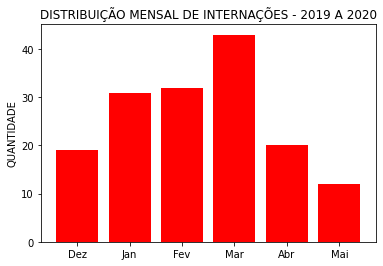

In [54]:
plt.bar(x, y, color='red')
#plt.plot(x, y, color='black')
plt.title('DISTRIBUIÇÃO MENSAL DE INTERNAÇÕES - 2019 A 2020') #adicionando o título
plt.xlabel('') #definindo nome do eixo X
plt.ylabel('QUANTIDADE') #definindo nome do eixo Y

plt.show()

 - Idade

In [52]:
sih['IDADE'].value_counts().head(20)

0     27
1     15
3     10
2      8
76     4
4      4
5      4
7      3
10     3
19     3
57     3
63     3
11     2
15     2
72     2
29     2
64     2
56     2
38     2
44     2
Name: IDADE, dtype: int64

In [70]:
sih['IDADE'].describe()

count    157.000000
mean      25.070064
std       27.963143
min        0.000000
25%        1.000000
50%       11.000000
75%       48.000000
max      101.000000
Name: IDADE, dtype: float64

<AxesSubplot:xlabel='IDADE', ylabel='Count'>

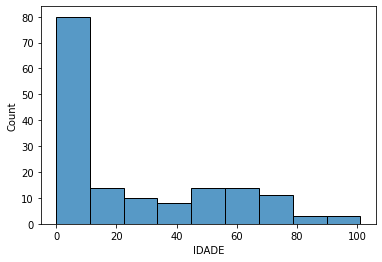

In [8]:
sns.histplot(data=sih, x='IDADE')

{'whiskers': [<matplotlib.lines.Line2D at 0x2642aef8790>,
 'caps': [<matplotlib.lines.Line2D at 0x2642aef8cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2642aef8400>],
 'medians': [<matplotlib.lines.Line2D at 0x2642af053d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2642af05760>],
 'means': []}

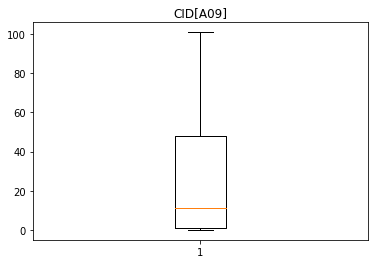

In [39]:
fig1, ax1 = plt.subplots()
ax1.set_title('CID[A09]')
ax1.boxplot(sih['IDADE'])

50% dos pacientes tem até 11 anos de idade, os mais novos tem até 1 ano e os mais velhos tem no minimo 48 anos. O paciente mais velho tem 101 anos.

 - Raça
 
 
 *A análise irá considerar <u>negros</u>* *como a soma de pretos e pardos, isto devido o recorte racial que está sendo feito na análise e entendimento da população negra no Brasil.*

In [41]:
sih['RACA_COR'].value_counts()

parda       57
ignorado    45
branca      27
preta       25
amarela      3
Name: RACA_COR, dtype: int64

In [45]:
sih['RACA_COR'].describe()

count       157
unique        4
top       negra
freq         82
Name: RACA_COR, dtype: object

In [44]:
sih['RACA_COR'].value_counts()*100/157

negra       52.229299
ignorado    28.662420
branca      17.197452
amarela      1.910828
Name: RACA_COR, dtype: float64

In [46]:
sih.filter(items=['IDADE']).groupby(sih['RACA_COR']).describe()

IDADE                                                     
         count       mean        std   min   25%   50%   75%    max
RACA_COR                                                           
amarela    3.0  58.333333  13.503086  45.0  51.5  58.0  65.0   72.0
branca    27.0  26.259259  31.101067   0.0   2.5   7.0  46.5   96.0
ignorado  45.0  23.066667  23.338809   0.0   3.0  14.0  44.0   71.0
negra     82.0  24.560976  29.174273   0.0   1.0   9.5  49.5  101.0

<AxesSubplot:xlabel='IDADE', ylabel='Count'>

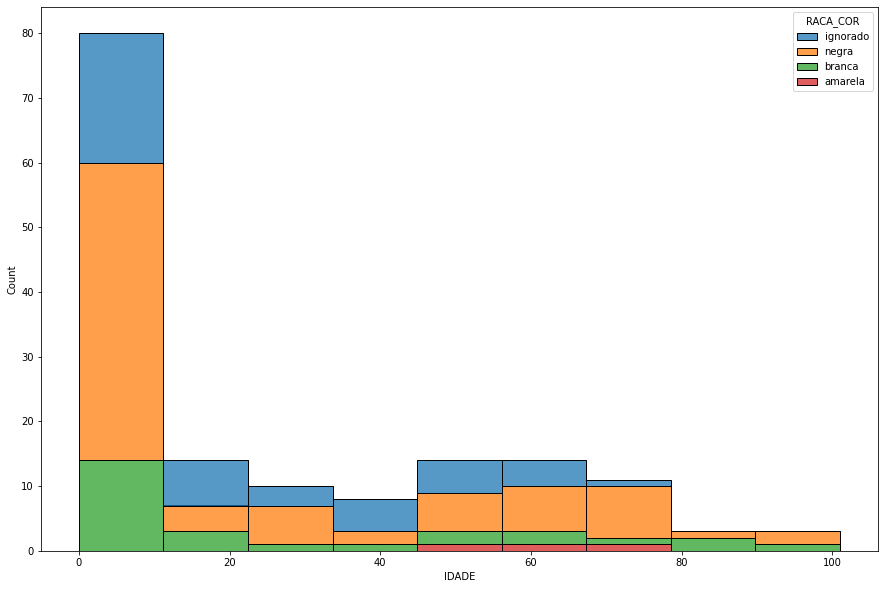

In [22]:
plt.figure(figsize=(15,10))
sns.histplot(data=sih, x='IDADE', hue='RACA_COR', multiple="stack")



52% dos paciente são negros e apenas 17,2% são brancos. Dos pacientes negros 50% tem até 10 anos de idade e os mais jovens tem até 1 ano.

- Gênero

In [75]:
sih['GENERO'].value_counts()*100/157

M    55.414013
F    44.585987
Name: GENERO, dtype: float64

In [7]:
sih.filter(items=['GENERO']).groupby(sih['RACA_COR']).describe()

GENERO                
          count unique top freq
RACA_COR                       
amarela       3      1   F    3
branca       27      2   M   14
ignorado     45      2   M   29
negra        82      2   M   44

<AxesSubplot:xlabel='IDADE', ylabel='Density'>

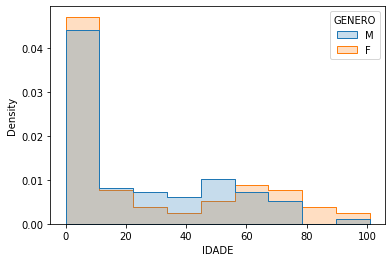

In [26]:
sns.histplot(data=sih, x= 'IDADE', hue='GENERO', element="step",
    stat="density", common_norm=False)


A diferença de gênero entre os pacientes não é tão grande, mas há mais homens sendo internados que mulheres e a maioria das crianças são do sexo feminino e nessa faixa etária que há maior incidencia de internações por doença relacionadas a falta de saneamento básico. Quando observamos os dados de gênero em relação a raça, temos que todos os pacientes declarados amarelos eram do sexo feminino. Mas há mais homens negros sendo internados por doenças relacionadas a falta de saneamento básico.

 - Localidade do paciente

In [8]:
sih['BAIRRO_PACIENTE'].value_counts()

Guaratiba        9
Maré             8
Campo Grande     7
Bonsucesso       6
Praça Seca       6
                ..
Estácio          1
São Cristóvão    1
Caju             1
Centro           1
Maracanã         1
Name: BAIRRO_PACIENTE, Length: 76, dtype: int64

<AxesSubplot:>

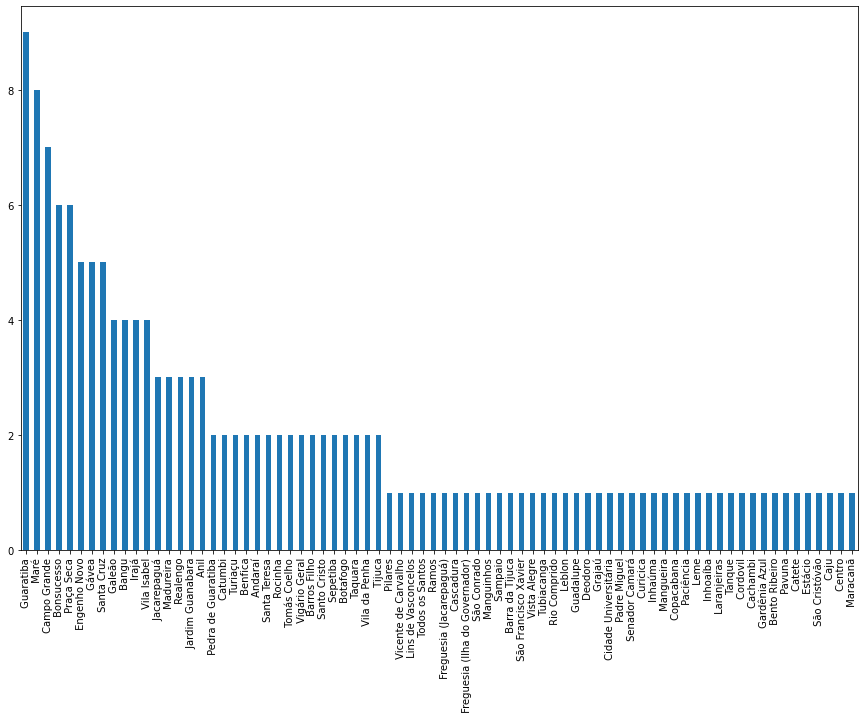

In [80]:
sih['BAIRRO_PACIENTE'].value_counts().plot(kind='bar', figsize=(15,10))

In [11]:
sih.loc[sih['BAIRRO_PACIENTE'] == 'Maré']

,Unnamed: 0.1,Unnamed: 0.1.1,ANO,MES,TIPO_ATENDIMENTO,CEP_PACIENTE,GENERO,CID_DESCRI,CID_COD,SITUACAO,...,ENDERECO_PACIENTE,COMPLEMENTO,BAIRRO_PACIENTE,LOCALIZACAO_PACIENTE,LOCATION_PACIENTE,POINT,END_COMPLETO_PACIENTE,LATITUDE_PACIENTE,LONGITUDE_PACIENTE,ZONA
11,11,11,2020,Jan,clin_medica,21046405,M,tto dengue,cid[A90]-Dengue [dengue clássico],curado,...,Rua Projetada CMaréMaré,(Vl Pinheiro),Maré,Rio de Janeiro,"Rua C, Vila do João, Maré, Rio de Janeiro, Reg...","-22.872078, -43.2348227, 0.0","Rua Projetada C, Maré",22.872078,-43.234823,Zona Norte do Rio de Janeiro
42,42,50,2020,Mar,clin_medica,21044580,F,tto doenças protozoarios,cid[B572]-Doença de Chagas (crônica) com compr...,melhorado,...,Rua das RosasMaréMaré,(Nova Holanda),Maré,Rio de Janeiro,NaN,"0.0, 0.0, 0.0","Rua das Rosas, Maré",0.000000,0.000000,Não localizado
119,119,151,2020,Fev,pediatria,21046020,M,tto doenças infec e intestinais,cid[A09]-Diarréia e gastroenterite de origem i...,melhorado,...,Via SeletivaMaréMaré,(Vl Pinheiro),Maré,Rio de Janeiro,NaN,"0.0, 0.0, 0.0","Via Seletiva, Maré",0.000000,0.000000,Não localizado
122,122,154,2020,Mar,pediatria,21046425,M,tto doenças infec e intestinais,cid[A09]-Diarréia e gastroenterite de origem i...,melhorado,...,Rua Projetada GMaréMaré,(Vl Pinheiro),Maré,Rio de Janeiro,"Rua Projetada G, Vila do João, Maré, Rio de Ja...","-22.871506, -43.2363402, 0.0","Rua Projetada G, Maré",22.871506,-43.236340,Zona Norte do Rio de Janeiro
125,125,159,2020,Mar,pediatria,21044510,M,tto doenças infec e intestinais,cid[A09]-Diarréia e gastroenterite de origem i...,melhorado,...,Rua Vinte e Nove de JaneiroMaréMaré,(Nova Holanda),Maré,Rio de Janeiro,NaN,"0.0, 0.0, 0.0","Rua Vinte e Nove de Janeiro, Maré",0.000000,0.000000,Não localizado
134,134,168,2020,Jan,pediatria,21044750,F,tto doenças infec e intestinais,cid[A09]-Diarréia e gastroenterite de origem i...,melhorado,...,Rua UmMaréMaré,(Nova Holanda),Maré,Rio de Janeiro,"Rua 1, Vila do João, Maré, Rio de Janeiro, Reg...","-22.8671644, -43.2417302, 0.0","Rua Um, Maré",22.867164,-43.241730,Zona Norte do Rio de Janeiro
138,138,172,2020,Mar,pediatria,21044570,M,tto doenças infec e intestinais,cid[A09]-Diarréia e gastroenterite de origem i...,melhorado,...,Rua HMaréMaré,(Nova Holanda),Maré,Rio de Janeiro,"Rue Jean Poulmarc'h, Le Murger Bardin, Rieuvil...","48.725072, 1.3739809, 0.0","Rua H, Maré",8.725072,1.373981,Zona Norte do Rio de Janeiro
153,153,187,2020,Mar,clin_medica,21042020,F,tto doenças infec e intestinais,cid[A09]-Diarréia e gastroenterite de origem i...,internado para diagnostico,...,Beco do AbacateMaréMaré,(Mro Timbau),Maré,Rio de Janeiro,"Beco do Abacate, Timbau, Maré, Rio de Janeiro,...","-22.8631956, -43.2395044, 0.0","Beco do Abacate, Maré",22.863196,-43.239504,Zona Norte do Rio de Janeiro


Criando uma nova coluna para zonas de localidade residente dos pacientes

In [214]:
sih['ZONA'].value_counts()*100/157

Zona Norte do Rio de Janeiro      35.668790
Zona Oeste do Rio de Janeiro      28.025478
Zona Central do Rio de Janeiro     7.006369
Zona Sul do Rio de Janeiro         7.006369
Name: ZONA, dtype: float64

In [217]:
# filtrar e agrupar por raça e zona
sih.filter(items=['ZONA']).groupby(sih['RACA_COR']).describe()

ZONA                                          
         count unique                           top freq
RACA_COR                                                
amarela      3      2    Zona Sul do Rio de Janeiro    2
branca      23      4  Zona Norte do Rio de Janeiro   13
ignorado    37      4  Zona Norte do Rio de Janeiro   16
negra       59      4  Zona Norte do Rio de Janeiro   26

In [98]:
# Filtrar por genero e zona
sih.filter(items=['ZONA']).groupby(sih['GENERO']).describe()

ZONAS                        
       count unique         top freq
GENERO                              
F         70      4  ZONA OESTE   32
M         87      4  ZONA NORTE   43

In [17]:
# Filtrar por sexo
fem = pd.DataFrame(sih.loc[sih['GENERO'] == 'F' ])
mas = pd.DataFrame(sih.loc[sih['GENERO'] == 'M' ])

In [18]:
# Filtrar genero feminino por raça
fem.filter(items=['ZONA']).groupby(fem['RACA_COR']).describe()

ZONAS                        
         count unique         top freq
RACA_COR                              
amarela      3      2    ZONA SUL    2
branca      13      3  ZONA OESTE    6
ignorado    16      4  ZONA NORTE    8
negra       38      3  ZONA OESTE   22

In [19]:
# Filtrar o genero masculino por raça
mas.filter(items=['ZONA']).groupby(mas['RACA_COR']).describe()

ZONAS                        
         count unique         top freq
RACA_COR                              
branca      14      3  ZONA NORTE   10
ignorado    29      4  ZONA NORTE   13
negra       44      4  ZONA NORTE   20

Os três bairros com maior número de pacientes são Guaratiba(9), Maré(8) e Campo Grande(7).

 45% das internações são de pacientes que moram na Zona norte do Rio de Janeiro, seguido de 37% na Zona Oeste. Ambos as zonas concentram a distribuição de pessoas negras no estado e são as áreas mais pobres da cidade, segundo Barbosa em https://desigualdadesespaciais.wordpress.com/.
 
 Ao relacionar a localidade de residencia dos pacientes com a raça, temos que o maior número de pacientes negros estão na Zona Oeste  e a maioria branca e ignorada estão na Zona Norte.
 A maioria das internações do sexo feminino estão na Zona Oeste e na Zona Norte concentra a maioria masculina. Quando observamos o genero, raça e zona juntos temos que 58% das mulheres negras internadas são da Zona Oeste e 45% dos homens negros são da Zona Norte.
 


 - Hospitais de Internações

In [63]:
sih['NOME FANTASIA'].value_counts()

UFRJ IPPMG INST DE PUER PED MARTAGAO GESTEIRA           18
SMS HOSPITAL MUNICIPAL NOSSA SENHORA DO LORETO AP 31    16
SMS HOSPITAL MUNICIPAL ROCHA FARIA AP 52                14
INI FIOCRUZ                                             12
MS HOSPITAL FEDERAL CARDOSO FONTES                      11
SMS RIO HOSPITAL MUNICIPAL SALGADO FILHO                10
SMS HOSPITAL MUNICIPAL DA PIEDADE AP 32                  9
SMS HOSPITAL MUNICIPAL MIGUEL COUTO AP 21                9
MS HGB HOSPITAL GERAL DE BONSUCESSO                      9
SMS HOSPITAL MUNICIPAL RONALDO GAZOLLA AP 33             9
MS HSE HOSPITAL DOS SERVIDORES DO ESTADO                 7
UERJ HOSPITAL UNIV PEDRO ERNESTO                         4
SMS HOSPITAL MUNICIPAL ALBERT SCHWEITZER AP 51           4
HOSPITAL MUNICIPAL SOUZA AGUIAR                          3
SMS HOSPITAL MUNICIPAL EVANDRO FREIRE AP 31              3
HOSPITAL FEDERAL DO ANDARAI                              3
SMS HOSPITAL MUNICIPAL PEDRO II AP 53                   

<AxesSubplot:>

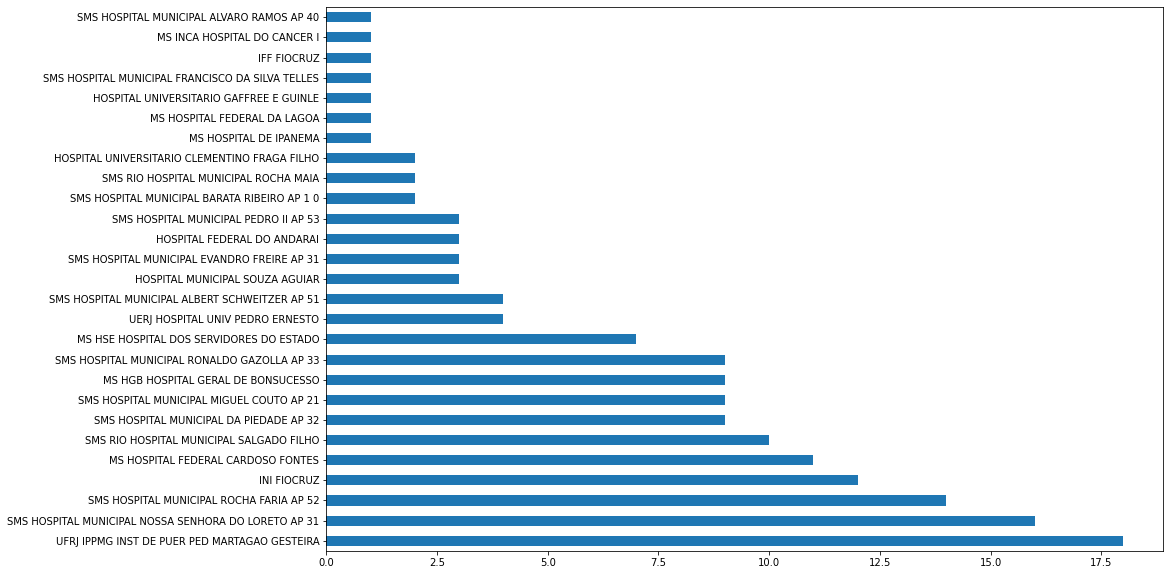

In [30]:
sih['NOME FANTASIA'].value_counts().plot(kind='barh', figsize=(15,10))

<AxesSubplot:>

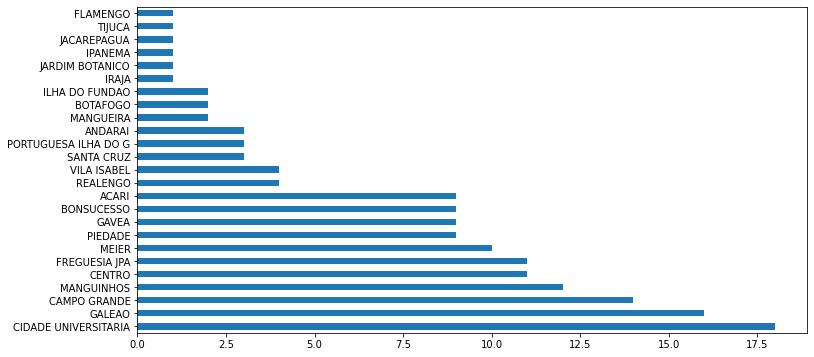

In [43]:
# Bairro dos Hospitais
sih['BAIRRO'].value_counts().plot(kind='barh', figsize=(12,6))

In [58]:
# criando coluna que agrupa os bairros por zona
sih['ZONAS_Hospital'] = sih['BAIRRO']

In [59]:
sih['ZONAS_Hospital'] = sih['ZONAS_Hospital'].map({'BONSUCESSO': 'ZONA NORTE',
                                          'MANGUEIRA':'ZONA NORTE',
                                          'CENTRO': 'ZONA CENTRAL',
                                          'BOTAFOGO':'ZONA SUL',
                                          'ACARI':'ZONA NORTE',
        'MANGUINHOS':'ZONA NORTE',
        'FREGUESIA JPA': 'ZONA OESTE',
        'PORTUGUESA ILHA DO G':'ZONA NORTE',
        'JACAREPAGUA':'ZONA OESTE',
        'PIEDADE':'ZONA NORTE',
        'IRAJA':'ZONA NORTE',
        'JARDIM BOTANICO':'ZONA SUL',
        'CAMPO GRANDE':'ZONA OESTE',
        'REALENGO':'ZONA OESTE',
        'SANTA CRUZ':'ZONA OESTE',
        'IPANEMA':'ZONA SUL',
        'MEIER':'ZONA NORTE',
        'VILA ISABEL':'ZONA NORTE',
        'CIDADE UNIVERSITARIA':'ZONA NORTE',
        'TIJUCA':'ZONA NORTE',
        'GALEAO':'ZONA NORTE',
        'GAVEA':'ZONA SUL',
        'FLAMENGO':'ZONA SUL',
        'ILHA DO FUNDAO':'ZONA NORTE',
        'ANDARAI':'ZONA NORTE'})

In [59]:
sih['ZONAS_Hospital'].value_counts()*100/157

ZONA NORTE      63.057325
ZONA OESTE      21.019108
ZONA SUL         8.917197
ZONA CENTRAL     7.006369
Name: ZONAS_Hospital, dtype: float64

In [26]:
# Salvando os dados não geolocalizados para fazer manualmente
sem_geoloc = pd.DataFrame(sih.loc[sih['LATITUDE_PACIENTE'].isnull()])

In [29]:
sem_geoloc.head()

,ANO,MES,TIPO_ATENDIMENTO,CEP_PACIENTE,GENERO,CID_DESCRI,CID_COD,SITUACAO,CNES,RACA_COR,...,LATITUDE,LONGITUDE,ENDERECO_PACIENTE,LOCATION_PACIENTE,POINT,BAIRRO_PACIENTE,LATITUDE_PACIENTE,LONGITUDE_PACIENTE,ZONAS,ZONAS_Hospital
7,2020,Fev,clin_medica,21030040,F,tto doenças infec e intestinais,cid[A09]-Diarréia e gastroenterite de origem i...,internado para diagnostico,2269880,ignorado,...,-22.86714,-43.24854,"Avenida Almirante Frontin, Ramos, Rio de Janei...",NaN,NaN,Ramos,NaN,NaN,ZONA NORTE,ZONA NORTE
15,2020,Jan,clin_medica,20250000,M,tto doenças infec e intestinais,cid[A09]-Diarréia e gastroenterite de origem i...,internado para diagnostico,2273489,negra,...,-22.95346,-43.17852,"Rua Maia Lacerda, Estácio, Rio de Janeiro - RJ",NaN,NaN,Estácio,NaN,NaN,ZONA CENTRAL,ZONA SUL
18,2020,Fev,clin_medica,22775450,M,tto doenças bact. zoonósticas,cid[A278]-Outras formas de leptospirose,melhorado,5717256,negra,...,-22.82519,-43.34750,"Rua Kazumba, Taquara, Rio de Janeiro - RJ",NaN,NaN,Taquara,NaN,NaN,ZONA OESTE,ZONA NORTE
20,2020,Mar,clin_medica,21043230,M,tto doenças bact. zoonósticas,cid[A279]-Leptospirose não especificada,administrativa,5717256,negra,...,-22.82519,-43.34750,"Rua Ivanildo Alves, Bonsucesso, Rio de Janeiro...",NaN,NaN,Bonsucesso,NaN,NaN,ZONA NORTE,ZONA NORTE
25,2020,Mai,clin_medica,22010060,F,tto afecções da pele,cid[B749]-Filariose não especificada,melhorado,2269988,ignorado,...,-22.89730,-43.18799,"Ladeira Ari Barroso, Leme, Rio de Janeiro - RJ",NaN,NaN,Leme,NaN,NaN,ZONA SUL,ZONA CENTRAL


In [36]:
sih.loc[sih['LATITUDE_PACIENTE'] != 'None']

,ANO,MES,TIPO_ATENDIMENTO,CEP_PACIENTE,GENERO,CID_DESCRI,CID_COD,SITUACAO,CNES,RACA_COR,...,LATITUDE,LONGITUDE,ENDERECO_PACIENTE,LOCATION_PACIENTE,POINT,BAIRRO_PACIENTE,LATITUDE_PACIENTE,LONGITUDE_PACIENTE,ZONAS,ZONAS_Hospital
0,2020,Jan,clin_medica,21660500,M,tto hepatite viral,cid[B159]-Hepatite A sem coma hepático,internado para diagnostico,2269880,ignorado,...,-22.86714,-43.24854,"Rua Margem da Linha, Barros Filho, Rio de Jane...","Rua Margem da Linha, Margem da Linha, Barros F...","(-22.8370879, -43.3680663, 0.0)",Barros Filho,-22.837088,-43.368066,ZONA NORTE,ZONA NORTE
1,2020,Jan,pediatria,21012140,F,tto infec. perinatal,cid[H10]-Conjuntivite,internado para diagnostico,2269880,ignorado,...,-22.86714,-43.24854,"Estrada do Porto Velho, Cordovil, Rio de Janei...","Estrada do Porto Velho, Cidade Alta, Cordovil,...","(-22.8209659, -43.2922273, 0.0)",Cordovil,-22.820966,-43.292227,ZONA NORTE,ZONA NORTE
2,2020,Abr,clin_medica,21931350,F,tto infecções virais,cid[B08]-Outras infecções virais caracterizada...,internado para diagnostico,2269880,ignorado,...,-22.86714,-43.24854,"Rua Gregório de Castro Morais, Jardim Guanabar...","Rua Gregório de Castro Morais, Jardim Guanabar...","(-22.8059119, -43.2029146, 0.0)",Jardim Guanabara,-22.805912,-43.202915,ZONA NORTE,ZONA NORTE
3,2019,Dez,pediatria,20261004,M,tto doenças infec e intestinais,cid[A09]-Diarréia e gastroenterite de origem i...,internado para diagnostico,2269880,negra,...,-22.86714,-43.24854,"Rua Aureliano Portugal, Rio Comprido, Rio de J...","Rua Aureliano Portugal, Rio Comprido, Zona Cen...","(-22.9262258, -43.2157276, 0.0)",Rio Comprido,-22.926226,-43.215728,ZONA CENTRAL,ZONA NORTE
4,2019,Dez,clin_medica,21210070,M,tto doenças infec e intestinais,cid[A09]-Diarréia e gastroenterite de origem i...,internado para diagnostico,2269880,branca,...,-22.86714,-43.24854,"Rua Arquimedes Memória, Vila da Penha, Rio de ...","Rua Arquimedes Memória, Vila da Penha, Zona No...","(-22.8452131, -43.3048533, 0.0)",Vila da Penha,-22.845213,-43.304853,ZONA NORTE,ZONA NORTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2020,Mar,clin_medica,21042020,F,tto doenças infec e intestinais,cid[A09]-Diarréia e gastroenterite de origem i...,internado para diagnostico,2280167,negra,...,-22.84244,-43.23738,"Beco do Abacate, Maré, Rio de Janeiro - RJ","Beco do Abacate, Timbau, Maré, Zona Norte do R...","(-22.8631956, -43.2395044, 0.0)",Maré,-22.863196,-43.239504,ZONA NORTE,ZONA NORTE
153,2020,Mar,clin_medica,21615310,F,tto interc. pós-transplantes,cid[A09]-Diarréia e gastroenterite de origem i...,internado para diagnostico,2273454,branca,...,-22.91232,-43.18858,"Estrada São Pedro de Alcântara, Deodoro, Rio d...","Estrada São Pedro de Alcântara, Deodoro, Zona ...","(-22.8559181, -43.3884427, 0.0)",Deodoro,-22.855918,-43.388443,ZONA OESTE,ZONA CENTRAL
154,2020,Mar,pediatria,20561230,F,tto doenças infec e intestinais,cid[A09]-Diarréia e gastroenterite de origem i...,melhorado,2269384,branca,...,-22.92738,-43.25170,"Rua Alfredo Pujol, Grajaú, Rio de Janeiro - RJ","Rua Alfredo Pujol, Grajaú, Zona Norte do Rio d...","(-22.9267537, -43.2635737, 0.0)",Grajaú,-22.926754,-43.263574,ZONA NORTE,ZONA NORTE
155,2020,Mar,pediatria,20550200,M,tto doenças infec e intestinais,cid[A09]-Diarréia e gastroenterite de origem i...,melhorado,2269384,negra,...,-22.92738,-43.25170,"Rua Oito de Dezembro, Maracanã, Rio de Janeiro...","Rua Oito de Dezembro, Vila Isabel, Zona Norte ...","(-22.9089277, -43.2387333, 0.0)",Maracanã,-22.908928,-43.238733,ZONA NORTE,ZONA NORTE


In [41]:
# Excluindo os valores nulos do dataframe 
sih2 = pd.DataFrame(sih.dropna(subset=["LATITUDE_PACIENTE"]))


In [15]:
sih.filter(items=['RACA_COR']).where(sih['RACA_COR'] == 'negra').groupby(sih['BAIRRO_PACIENTE']).count()

,RACA_COR
BAIRRO_PACIENTE,
Andaraí,1
Anil,2
Bangu,2
Barra da Tijuca,1
Barros Filho,1
...,...
Vicente de Carvalho,0
Vigário Geral,2
Vila Isabel,1


In [38]:
sih2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 156
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ANO                 122 non-null    int64  
 1   MES                 122 non-null    object 
 2   TIPO_ATENDIMENTO    122 non-null    object 
 3   CEP_PACIENTE        122 non-null    int64  
 4   GENERO              122 non-null    object 
 5   CID_DESCRI          122 non-null    object 
 6   CID_COD             122 non-null    object 
 7   SITUACAO            122 non-null    object 
 8   CNES                122 non-null    int64  
 9   RACA_COR            122 non-null    object 
 10  IDADE               122 non-null    int64  
 11  IBGE                122 non-null    int64  
 12  UF                  122 non-null    object 
 13  MUNICIPIO           122 non-null    object 
 14  NOME FANTASIA       122 non-null    object 
 15  RAZAO SOCIAL        122 non-null    object 
 16  CNPJ PRO

Criando os ddos do mapa

In [80]:
dados_map =  pd.DataFrame(sih2['LATITUDE_PACIENTE'].value_counts())

In [81]:
dados_map = dados_map.reset_index()

In [82]:
dados_map = dados_map.rename(columns={'LATITUDE_PACIENTE': 'INTERNACOES', 'index':'LATITUDE_PACIENTE'})

In [83]:
dados_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE_PACIENTE  106 non-null    float64
 1   INTERNACOES        106 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.8 KB


In [84]:
# Criando novo DataFrame com a frequencia de internação por localidade
dados_map1  = pd.merge(dados_map, coordenadas, on='LATITUDE_PACIENTE', how="inner")

In [86]:
# Tirando os dados duplicados
dados_map1 = dados_map1.drop_duplicates()

In [89]:
# observando os dados
dados_map1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 121
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LATITUDE_PACIENTE   106 non-null    float64
 1   INTERNACOES         106 non-null    int64  
 2   LONGITUDE_PACIENTE  106 non-null    float64
 3   BAIRRO_PACIENTE     106 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 4.1+ KB


#### MAPA DE INTERNAÇÕES POR LOCALIDADE RESIDENTE DOS PACIENTES


In [39]:
coordenadas = sih2[['LATITUDE_PACIENTE', 'LONGITUDE_PACIENTE','BAIRRO_PACIENTE']]

In [91]:
coordenadas2 = dados_map1[['LATITUDE_PACIENTE', 'LONGITUDE_PACIENTE','INTERNACOES']]

In [45]:
map_1 = folium.Map(
                width= '100%',
                heigth = '100%',
                location = [-22.0622469,-44.04462],
                zoom_start = 8)

In [46]:
steps=20
colormap = branca.colormap.linear.YlOrRd_09.scale(0, 1).to_step(steps)
colormap.caption = 'Internações'
gradient_map=defaultdict(dict)
for i in range(steps):
    gradient_map[1/steps*i] = colormap.rgb_hex_str(1/steps*i)
colormap.add_to(map_1) 

In [92]:
map_1 = map_1.add_child(plugins.HeatMap(coordenadas2,fill_opacity = 0.5, gradient = gradient_map, 
                                            show=True))

In [93]:
for i in range(0, len(dados_map1)):
    folium.Circle(
        location = [dados_map1.iloc[i]['LATITUDE_PACIENTE'] , dados_map1.iloc[i]['LONGITUDE_PACIENTE']],
        color = '#00FF69',
        fill = '#00A1B3',
        tooltip = '<li><bold> MUNICIPIO:' +str(dados_map1.iloc[i]['BAIRRO_PACIENTE']) + "</bold><li>"+
                  '<li><bold> INTERNAÇÕES:' + str(dados_map1.iloc[i]['INTERNACOES']) + "</bold><li>",
        radius = (dados_map1.iloc[i]['INTERNACOES']**1.1)
    ).add_to(map_1)

In [94]:
map_1

#### Explorando os dados por CID de maior incidência

1. Quais os cids e quantas internações teve cada um?

In [11]:
sih['CID_COD'].value_counts()*100/157

cid[A09]-Diarréia e gastroenterite de origem infecciosa presumível                            67.515924
cid[A279]-Leptospirose não especificada                                                       10.191083
cid[B572]-Doença de Chagas (crônica) com comprometimento cardíaco                              7.006369
cid[A90]-Dengue [dengue clássico]                                                              2.547771
cid[B839]-Helmintíase não especificada                                                         1.910828
cid[B88]-Outras infestações                                                                    1.910828
cid[A278]-Outras formas de leptospirose                                                        1.273885
cid[A27]-Leptospirose                                                                          1.273885
cid[B159]-Hepatite A sem coma hepático                                                         0.636943
cid[Z136]-Exame especial de rastreamento de doenças cardiovascul

<AxesSubplot:>

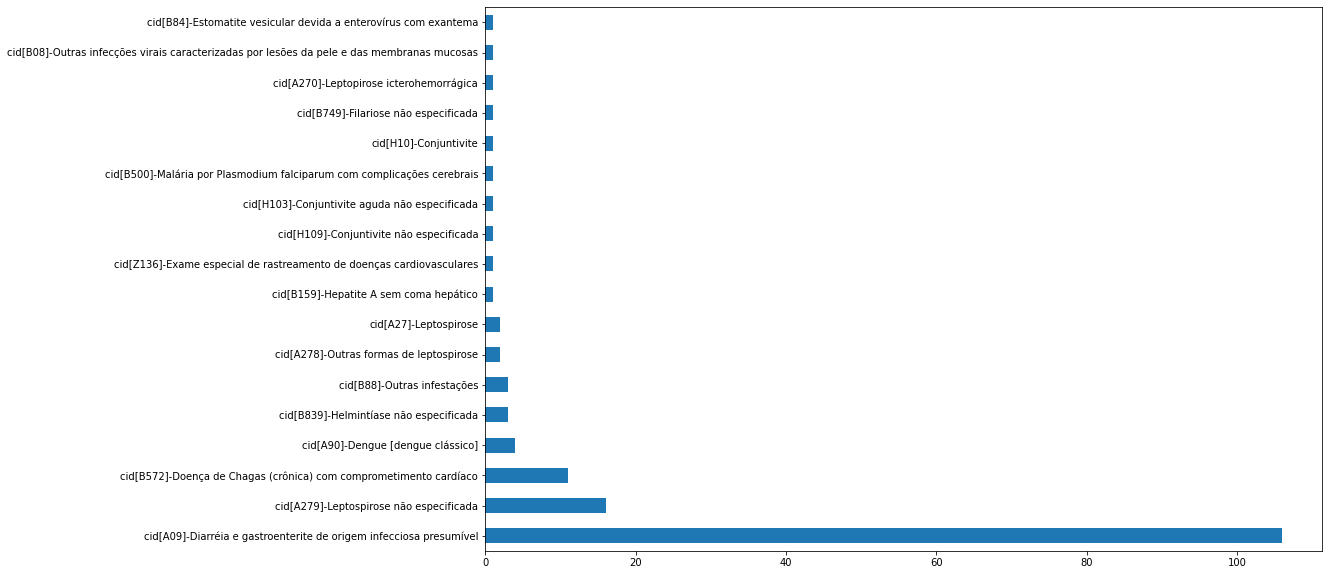

In [15]:
sih['CID_COD'].value_counts().plot(kind='barh', figsize=(15,10))

67.5% das internações são por Diarréia e gastroenterite de origem infecciosa presumível, tendo 10% das internações por Leptospirose não especificada, 7% Doença de Chagas (crônica) com comprometimento cardíaco e os 15.5% restante de internações estão distribuídos entre os outros CIDs relacionados a doenças oriundas do saneamento inadequado.

Como internações por Diarréia e gastroenterite de origem infecciosa presumível tem grandes indices de internações comparados aos outros CIDs, será então focado a análise a partir deste ponto para esse diagnóstico.


In [61]:
# Filtrando o dataframe apenas pela internações e criando um novo dataframe com o cid de maior incidência 
cid_A09 = sih.loc[sih['CID_COD'] == 'cid[A09]-Diarréia e gastroenterite de origem infecciosa presumível']

Observando a descrição de CID A09 - Diarréia e gastroenterite de origem infecciosa presumível

In [12]:
cid_A09['CID_DESCRI'].value_counts()*100/106

tto doenças infec e intestinais    80.188679
atend. urgência pediátrica          8.490566
tto interc. pós-transplantes        2.830189
proced. urg. clinica cirurgica      1.886792
tto choque hipovolemico             0.943396
tto oncologico                      0.943396
tto doenças intestino               0.943396
tto hipertensão secundária          0.943396
diag. e atend. urg.clin.medica      0.943396
tto de enteristes e colistes        0.943396
tto outras doenças bact.            0.943396
Name: CID_DESCRI, dtype: float64

80.2% das internações por CID A09 são para tratamento de doenças infecciosas e intestinais, 8.5% são de atendimentos  de urgência pediátrica e os restantes 11.3% são relacionados a outros tipos de tratamento. Abaixo será feito um detalhamento maior das internações por CID A09 de maior incidência.

In [62]:
#Filtrando o dataframe pela descrição do CID com maior ocorrência
cid_descr_1 = cid_A09.loc[cid_A09['CID_DESCRI'] =='tto doenças infec e intestinais']

2. Como é a distribuição de idade para internações por diarréia e gastroenterite infecciosa?


In [15]:
# Comportamento dos dados de idade
cid_A09['IDADE'].describe()

count    106.000000
mean      19.235849
std       26.894344
min        0.000000
25%        1.000000
50%        3.000000
75%       35.500000
max       96.000000
Name: IDADE, dtype: float64

In [22]:
# Observando a distribuição dos dados
cid_A09['IDADE'].value_counts()

0     23
1     13
3     10
2      8
10     3
7      3
5      3
4      3
58     2
8      2
57     2
74     1
64     1
90     1
52     1
9      1
72     1
69     1
11     1
24     1
19     1
31     1
13     1
37     1
25     1
6      1
81     1
68     1
63     1
56     1
15     1
60     1
71     1
70     1
48     1
67     1
17     1
53     1
45     1
46     1
66     1
96     1
61     1
30     1
47     1
Name: IDADE, dtype: int64

<AxesSubplot:>

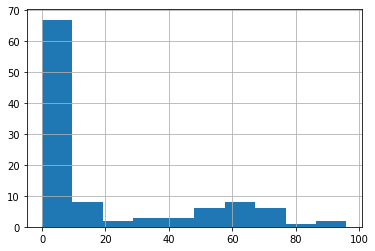

In [32]:
# Distribuição dos dados
cid_A09['IDADE'].hist()

<AxesSubplot:ylabel='IDADE'>

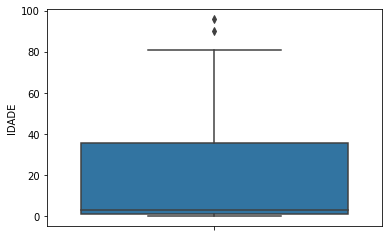

In [19]:
sns.boxplot(data=cid_A09, y='IDADE')

Distribuição de idade tto doenças infec e intestinais 

In [45]:
# Distribuição de idade pela descricao do cid - tto doenças infec e intestinais 
cid_descr_1['IDADE'].value_counts()

0     19
1     11
3     10
2      8
4      3
5      3
10     3
58     2
7      1
8      1
31     1
11     1
37     1
13     1
19     1
74     1
57     1
64     1
25     1
17     1
81     1
61     1
30     1
6      1
96     1
66     1
46     1
45     1
68     1
48     1
70     1
71     1
15     1
72     1
Name: IDADE, dtype: int64

In [47]:
cid_descr_1['IDADE'].describe()

count    85.000000
mean     16.094118
std      25.190996
min       0.000000
25%       1.000000
50%       3.000000
75%      17.000000
max      96.000000
Name: IDADE, dtype: float64

<AxesSubplot:>

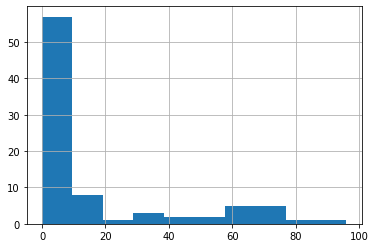

In [18]:
cid_descr_1['IDADE'].hist()

<AxesSubplot:ylabel='IDADE'>

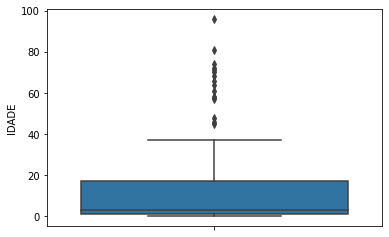

In [20]:
sns.boxplot(data=cid_descr_1, y='IDADE')

A média de idade não representa bem os dados, isso devido a variabilidade de idade nos 25% mais velhos. Então vamos considerar a mediana, assim temos que 50% dos paciente tem até 3 anos.
Observando a descrição do CID A09 tem-se que o tratamento de  doenças infecciosas e intestinais tem  maior incidência em crianças de até 3 anos.

 - Gênero das intenações por diarreia e gastroenterite

In [33]:
cid_A09['GENERO'].value_counts()

M    56
F    50
Name: GENERO, dtype: int64

<AxesSubplot:xlabel='IDADE', ylabel='Density'>

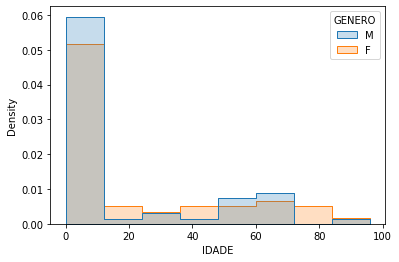

In [21]:
#gráfico genero/idade
sns.histplot(data=cid_A09, x= 'IDADE', hue='GENERO', element="step",
    stat="density", common_norm=False)

In [22]:
cid_descr_1['GENERO'].value_counts()

M    46
F    39
Name: GENERO, dtype: int64

<AxesSubplot:xlabel='IDADE', ylabel='Density'>

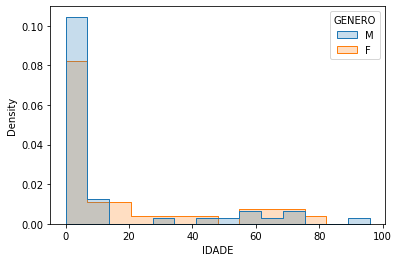

In [23]:
#gráfico genero/idade
sns.histplot(data=cid_descr_1, x= 'IDADE', hue='GENERO', element="step",
    stat="density", common_norm=False)

Há mais mulheres se internando que homens com Diarréia e gastroenterite de origem infecciosa presumível , mas na faixa etária com maior incidência homens são os mais internados. Os dados se comportam da mesma forma quando observamos as internações com descrição de  tratamento de doenças infecciosas e intestinais. Mas diferente quando comparamos ao comportamento dos dados em geral das internações.

 - Raça


In [41]:
cid_A09['RACA_COR'].value_counts()*100/106

negra       55.660377
ignorado    22.641509
branca      19.811321
amarela      1.886792
Name: RACA_COR, dtype: float64

In [42]:
cid_A09.filter(items=['IDADE']).groupby(cid_A09['RACA_COR']).describe()

IDADE                                                      
         count       mean        std   min    25%   50%    75%   max
RACA_COR                                                            
amarela    2.0  51.500000   9.192388  45.0  48.25  51.5  54.75  58.0
branca    21.0  19.761905  29.207713   0.0   1.00   3.0  30.00  96.0
ignorado  24.0  22.125000  26.364193   0.0   2.75   6.5  52.25  71.0
negra     59.0  16.779661  26.317077   0.0   0.00   2.0  20.50  90.0

<AxesSubplot:xlabel='IDADE', ylabel='Count'>

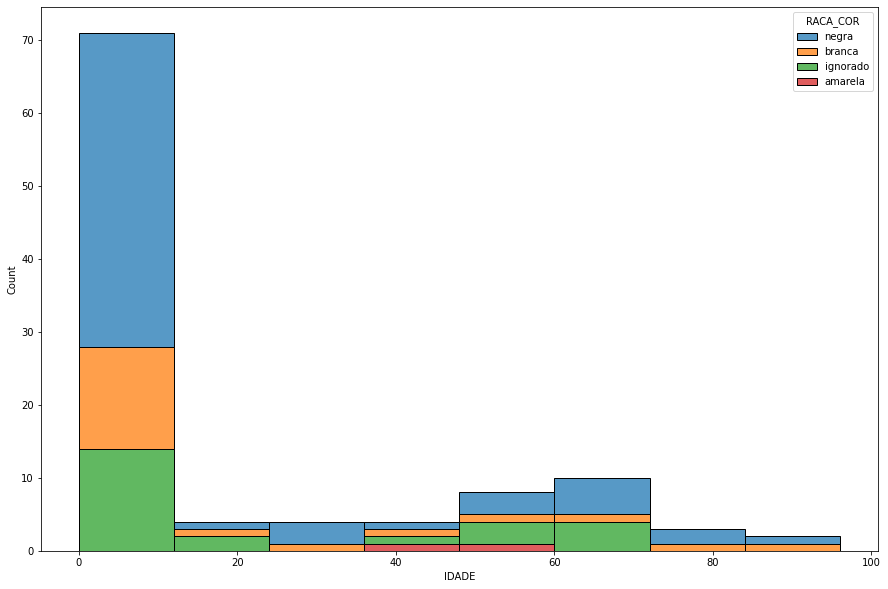

In [43]:
plt.figure(figsize=(15,10))
sns.histplot(data=cid_A09, x='IDADE', hue='RACA_COR', multiple="stack")

In [44]:
cid_A09.filter(items=['GENERO']).groupby(cid_A09['RACA_COR']).describe()

GENERO                
          count unique top freq
RACA_COR                       
amarela       2      1   F    2
branca       21      2   F   11
ignorado     24      2   M   15
negra        59      2   M   31

In [53]:
cid_descr_1['RACA_COR'].value_counts()*100/85

negra       57.647059
branca      21.176471
ignorado    18.823529
amarela      2.352941
Name: RACA_COR, dtype: float64

In [49]:
cid_descr_1.filter(items=['IDADE']).groupby(cid_descr_1['RACA_COR']).describe()

IDADE                                                      
         count       mean        std   min    25%   50%    75%   max
RACA_COR                                                            
amarela    2.0  51.500000   9.192388  45.0  48.25  51.5  54.75  58.0
branca    18.0  17.277778  29.136203   0.0   1.25   3.0  16.00  96.0
ignorado  16.0  10.312500  18.643028   0.0   1.00   3.0   7.75  71.0
negra     49.0  16.102041  25.210980   0.0   0.00   2.0  17.00  81.0

<AxesSubplot:xlabel='IDADE', ylabel='Count'>

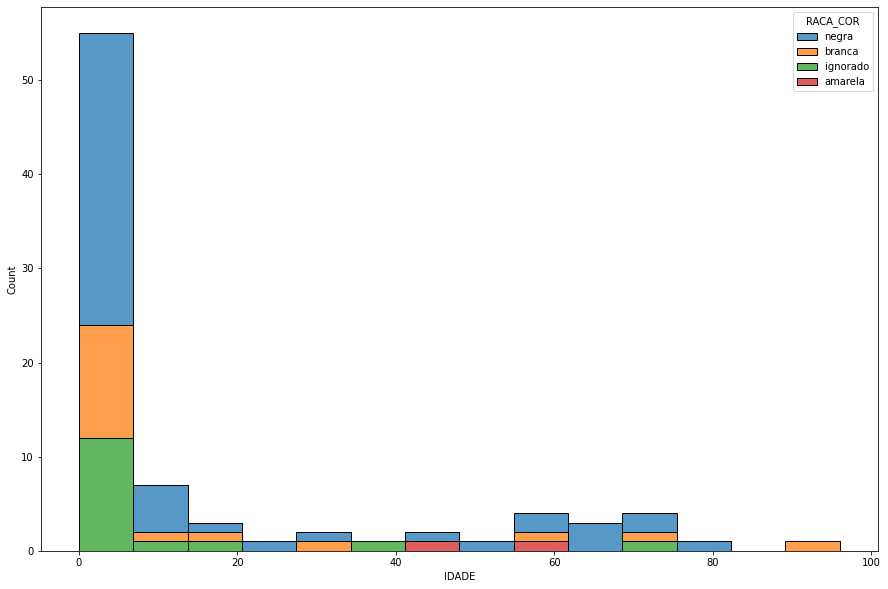

In [50]:
plt.figure(figsize=(15,10))
sns.histplot(data=cid_descr_1, x='IDADE', hue='RACA_COR', multiple="stack")

In [51]:
cid_descr_1.filter(items=['GENERO']).groupby(cid_descr_1['RACA_COR']).describe()

GENERO                
          count unique top freq
RACA_COR                       
amarela       2      1   F    2
branca       18      2   M   10
ignorado     16      2   M   10
negra        49      2   M   26

Aproximadamente 56% das internações por Diarréia e gastroenterite de origem infecciosa presumível são de pessoas autodeclaradas negras e 23% sem informação de raça. Os dados se comportam aproximadamente da mesma forma quando observamos as internações com descrição de  tratamento de doenças infecciosas e intestinais. 

Quando observamos os dados de raça por idade, temos que 50% dos pacientes negros tem até 2 anos, 50% dos pacientes brancos tem até 3 anos e metade dos pacientes sem declaração de raça tem até 7 anos. 

Pacientes declarados negros ou sem raça são a maioria homens, enquanto brancos e amarelos são a maioria mulher. Já para as internações com descrição de  tratamento de doenças infecciosas e intestinais homens são a maioria entre negros, brancos e sem informação de raça.



 - Visualizando a localidade dos pacientes

In [80]:
cid_A09['BAIRRO_PACIENTE'].value_counts()*100/106

 Guaratiba                         7.547170
 Campo Grande                      6.603774
 Maré                              5.660377
 Engenho Novo                      3.773585
 Bangu                             3.773585
 Bonsucesso                        3.773585
 Realengo                          2.830189
 Gávea                             2.830189
 Vila Isabel                       2.830189
 Anil                              2.830189
 Madureira                         2.830189
 Galeão                            2.830189
 Praça Seca                        2.830189
 Irajá                             2.830189
 Rocinha                           1.886792
 Sepetiba                          1.886792
 Jacarepaguá                       1.886792
 Benfica                           1.886792
 Santa Teresa                      1.886792
 Andaraí                           1.886792
 Turiaçu                           1.886792
 Catumbi                           1.886792
 Sampaio                        

<AxesSubplot:>

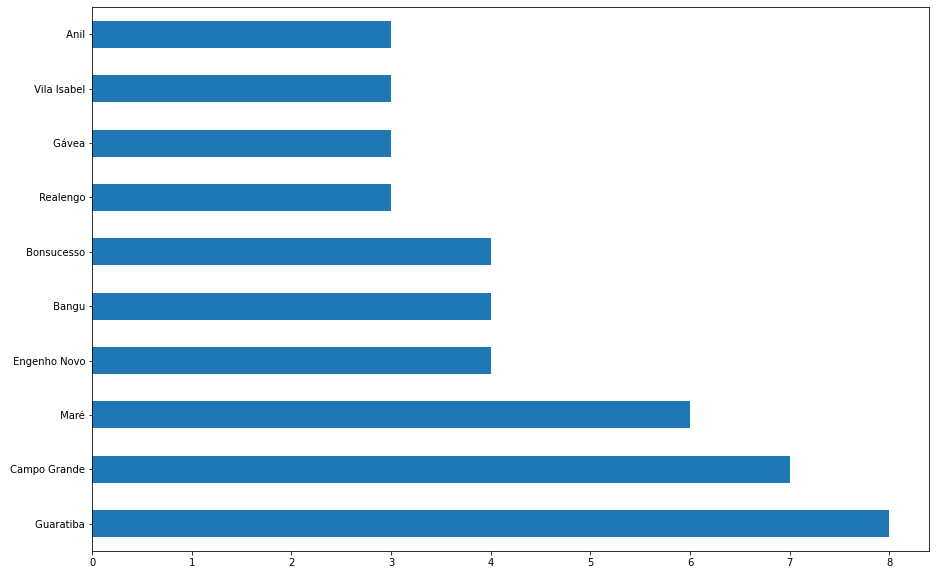

In [35]:
# Os 10 bairros com maior número de pacientes residentes
cid_A09['BAIRRO_PACIENTE'].value_counts().head(10).plot(kind='barh', figsize=(15,10))

In [65]:
cid_A09['ZONAS'].value_counts()*100/106

ZONA NORTE      46.226415
ZONA OESTE      38.679245
ZONA CENTRAL     7.547170
ZONA SUL         7.547170
Name: ZONAS, dtype: float64

In [68]:
# filtrar e agrupar por raça e zona
cid_A09.filter(items=['ZONAS']).groupby(cid_A09['RACA_COR']).describe()

ZONAS                        
         count unique         top freq
RACA_COR                              
amarela      2      2    ZONA SUL    1
branca      21      3  ZONA NORTE   12
ignorado    24      4  ZONA NORTE   10
negra       59      4  ZONA OESTE   27

In [69]:
# Filtrar por genero e zona
cid_A09.filter(items=['ZONAS']).groupby(cid_A09['GENERO']).describe()

ZONAS                        
       count unique         top freq
GENERO                              
F         50      4  ZONA OESTE   23
M         56      4  ZONA NORTE   28

In [70]:
# Filtrar por sexo
fem2 = pd.DataFrame(cid_A09.loc[cid_A09['GENERO'] == 'F' ])
mas2 = pd.DataFrame(cid_A09.loc[cid_A09['GENERO'] == 'M' ])

In [71]:
# Filtrar genero feminino por raça
fem2.filter(items=['ZONAS']).groupby(fem2['RACA_COR']).describe()

ZONAS                        
         count unique         top freq
RACA_COR                              
amarela      2      2    ZONA SUL    1
branca      11      3  ZONA NORTE    5
ignorado     9      4  ZONA NORTE    4
negra       28      3  ZONA OESTE   16

In [72]:
# Filtrar o genero masculino por raça
mas2.filter(items=['ZONAS']).groupby(mas2['RACA_COR']).describe()

ZONAS                        
         count unique         top freq
RACA_COR                              
branca      10      2  ZONA NORTE    7
ignorado    15      4  ZONA NORTE    6
negra       31      4  ZONA NORTE   15

7.5% dos pacientes são residentes de Guaratiba, 7% de Campo Grande e 6% da Maré. A diferença para as internações em geral é que a Maré possui maior incidência que Campo Grande.

46% dos pacientes são da Zona Norte e 38% da Zona Oeste, aproxidamente igual as internações em geral.

Pacientes declarados negros tem a maioria residente na Zona Oeste, enquanto brancos e ignorados estão a maioria na Zona Norte. A maioria das mulheres residem na Zona Oeste e a maoria masculina reside na Zona Norte.

Pacientes declaradas mulheres negras estão em sua maioria na Zona Oeste. Já mulheres e homens brancos, assimo como homens negros, sem infomação e mulheres sem informação estão em maioria na Zona Norte.


In [54]:
cid_descr_1['BAIRRO_PACIENTE'].value_counts()

 Maré                              6
 Campo Grande                      5
 Guaratiba                         5
 Bonsucesso                        4
 Gávea                             3
 Engenho Novo                      3
 Vila Isabel                       3
 Realengo                          3
 Andaraí                           2
 Anil                              2
 Santa Teresa                      2
 Galeão                            2
 Catumbi                           2
 Turiaçu                           2
 Benfica                           2
 Praça Seca                        2
 Jacarepaguá                       2
 Irajá                             2
 Rocinha                           2
 Bangu                             2
 Madureira                         1
 Tubiacanga                        1
 Vista Alegre                      1
 São Francisco Xavier              1
 Taquara                           1
 Barra da Tijuca                   1
 Leblon                            1
 

<AxesSubplot:>

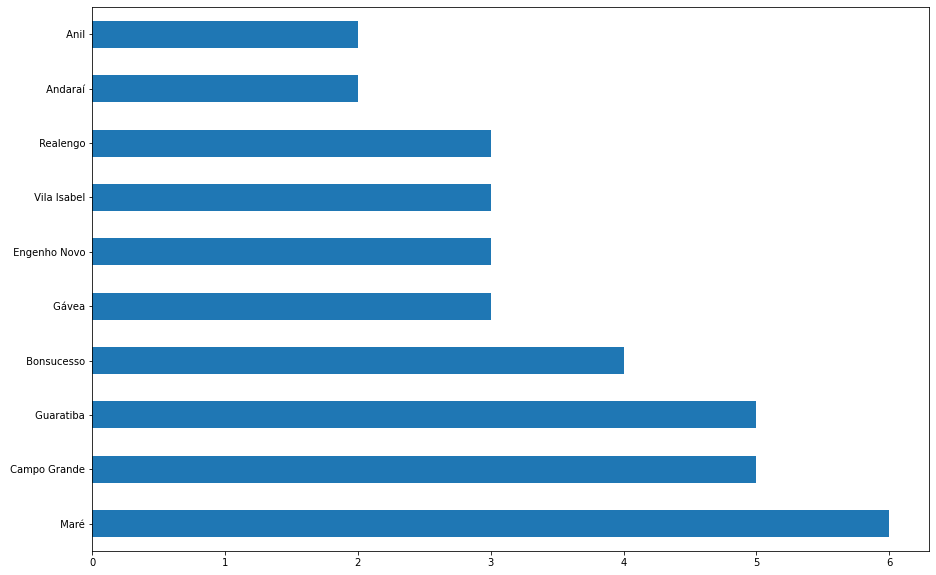

In [55]:
cid_descr_1['BAIRRO_PACIENTE'].value_counts().head(10).plot(kind='barh', figsize=(15,10))

In [67]:
cid_descr_1['ZONAS'].value_counts()*100/85

ZONA NORTE      51.764706
ZONA OESTE      30.588235
ZONA CENTRAL     9.411765
ZONA SUL         8.235294
Name: ZONAS, dtype: float64

Agora quando observamos as internações por  Diarréia e gastroenterite de origem infecciosa presumível com descrição de  tratamento de doenças infecciosas e intestinais temos um cenário diferente, em que 52% dos pacientes residem na Zona Norte e 31% na Zona Oeste, com a Maré tendo a maior incidência de casos. Em relação a raça a maioria branca, negra e ignorada é da Zona Norte e assim como para gênero a maioria é da Zona Norte.

In [74]:
# filtrar e agrupar por raça e zona
cid_descr_1.filter(items=['ZONAS']).groupby(cid_descr_1['RACA_COR']).describe()

ZONAS                        
         count unique         top freq
RACA_COR                              
amarela      2      2    ZONA SUL    1
branca      18      3  ZONA NORTE   12
ignorado    16      4  ZONA NORTE    7
negra       49      4  ZONA NORTE   24

In [75]:
# Filtrar por genero e zona
cid_descr_1.filter(items=['ZONAS']).groupby(cid_descr_1['GENERO']).describe()

ZONAS                        
       count unique         top freq
GENERO                              
F         39      4  ZONA NORTE   19
M         46      4  ZONA NORTE   25

In [81]:
# Filtrar por sexo
fem3 = pd.DataFrame(cid_descr_1.loc[cid_descr_1['GENERO'] == 'F' ])
mas3 = pd.DataFrame(cid_descr_1.loc[cid_descr_1['GENERO'] == 'M' ])

In [82]:
# Filtrar genero feminino por raça
fem3.filter(items=['ZONAS']).groupby(fem3['RACA_COR']).describe()

ZONAS                        
         count unique         top freq
RACA_COR                              
amarela      2      2    ZONA SUL    1
branca       8      3  ZONA NORTE    5
ignorado     6      3  ZONA NORTE    3
negra       23      3  ZONA OESTE   12

In [83]:
# Filtrar o genero masculino por raça
mas3.filter(items=['ZONAS']).groupby(mas3['RACA_COR']).describe()

ZONAS                        
         count unique         top freq
RACA_COR                              
branca      10      2  ZONA NORTE    7
ignorado    10      4  ZONA NORTE    4
negra       26      4  ZONA NORTE   14